In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## explore

In [5]:
data=pd.read_csv("/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
data.shape

(973, 15)

In [10]:
data['Gender']=data['Gender'].astype("category")

In [11]:
data["Gender"].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [14]:
data["Session_Duration (hours)"].nunique()

147

In [15]:
data["Workout_Frequency (days/week)"].nunique()

4

In [16]:
data["Workout_Frequency (days/week)"].unique()

array([4, 3, 5, 2])

In [17]:
data["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [18]:
data.isnull()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
969,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
970,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [ ]:
data[""]

In [ ]:
data["Water_Intake (liters)"].

In [22]:
data["Fat_Percentage"].nunique()

239

<Axes: xlabel='Age', ylabel='Workout_Type'>

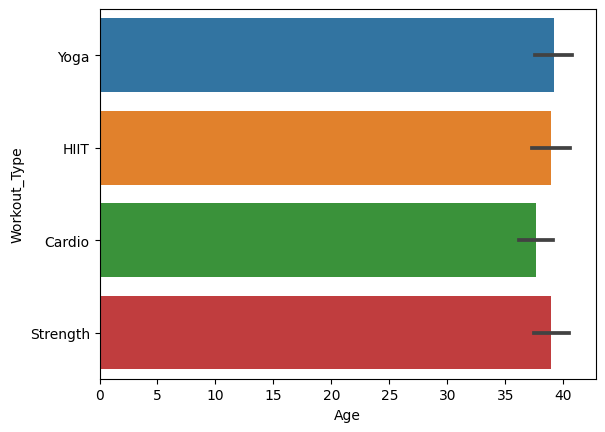

In [25]:
sns.barplot(data=data , x="Age" , y="Workout_Type")

In [32]:
data[data["Age"]>50].shape

(210, 15)

In [34]:
data[data["Age"]>60].shape

(0, 15)

In [40]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
sns.scatterplot(data=data , x="Gender" , y="Workout_Type")

In [51]:
data.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [55]:
data["Calories_Burned"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: Calories_Burned
Non-Null Count  Dtype  
--------------  -----  
973 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [143]:
data.head(4)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41


In [142]:
y[3]

2

In [ ]:
3-->yoga , 1-->hiit , 3-->cardio , 4-->strength

In [57]:
data.tail(2)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


<Axes: xlabel='Age', ylabel='Fat_Percentage'>

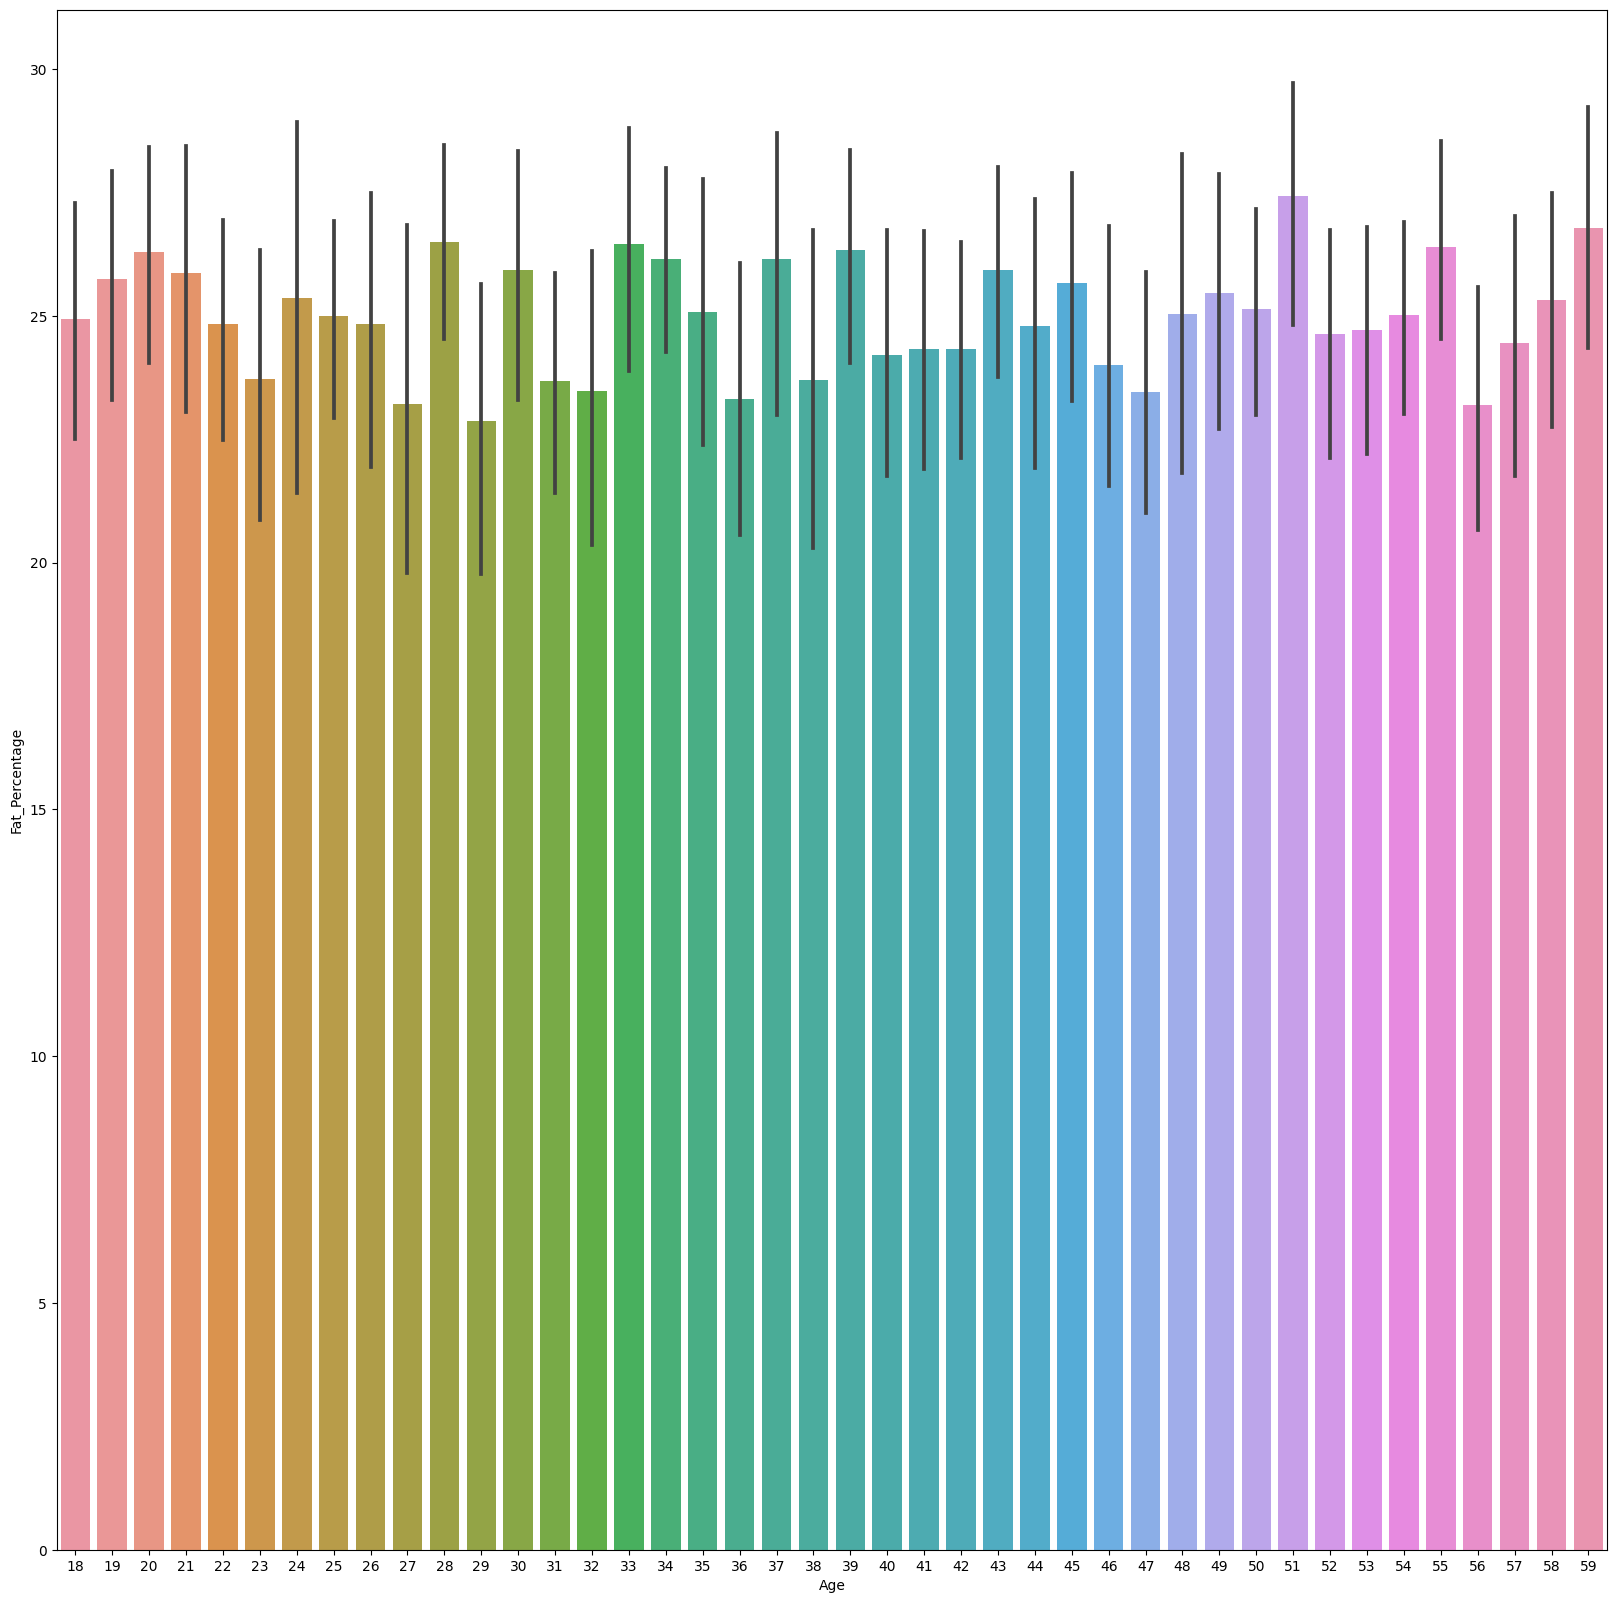

In [60]:
plt.figure(figsize=(20 ,20))
sns.barplot(data=data , x="Age" , y="Fat_Percentage")

<Axes: xlabel='Age', ylabel='Session_Duration (hours)'>

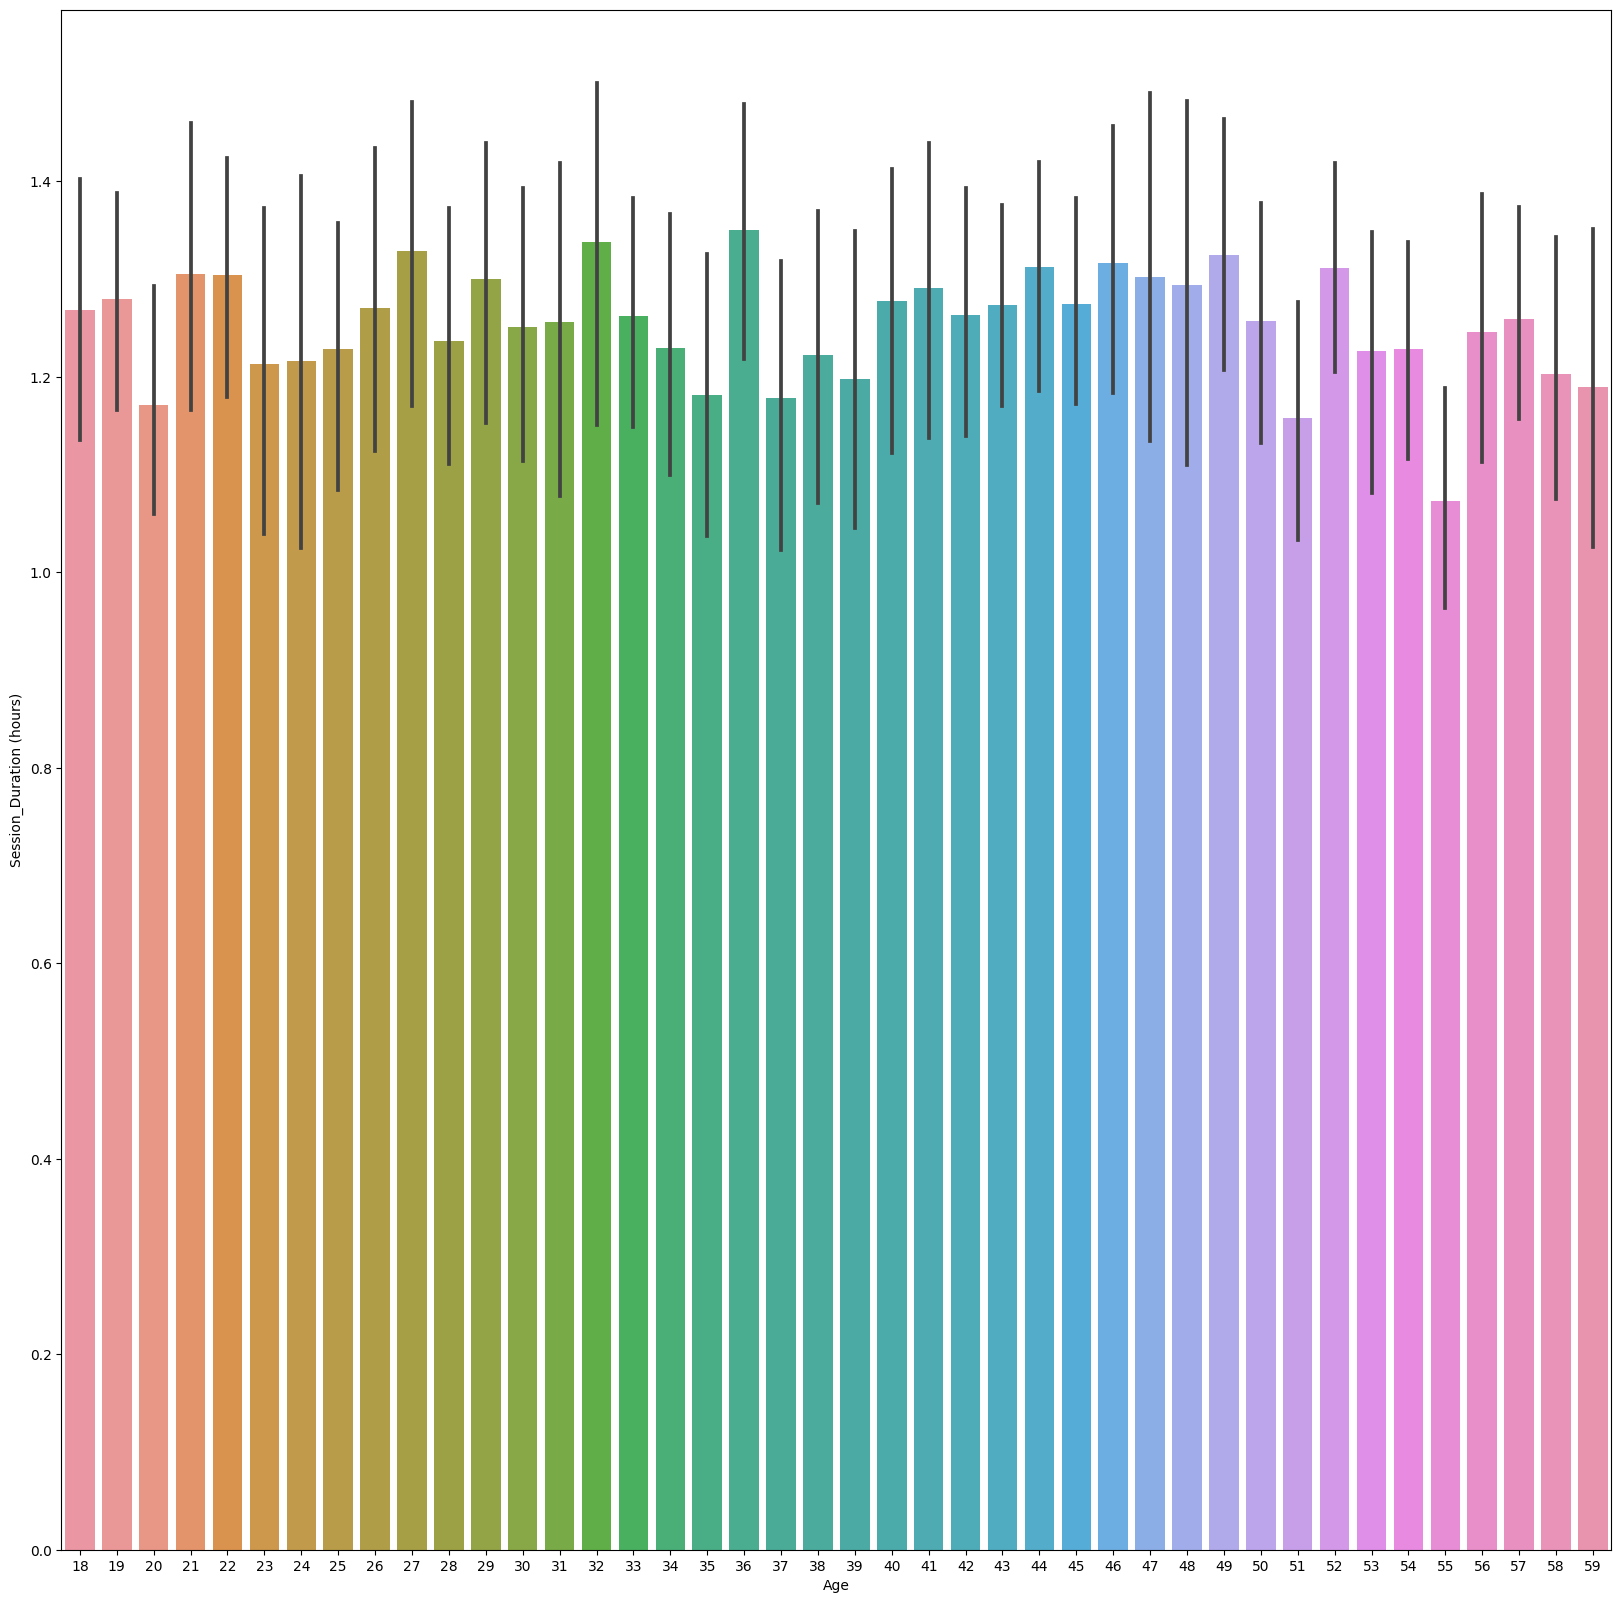

In [63]:
plt.figure(figsize=(20 ,20))
sns.barplot(data=data , x="Age" , y="Session_Duration (hours)")

In [ ]:
sns.

In [ ]:
sns.boxplot(data=data, x="Workout_Frequency (days/week)" , y="Calories_Burned")

In [ ]:
sns.barplot(data=data, x="Workout_Frequency (days/week)" , y="Calories_Burned" )

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(data=data , x="Age" , y="Calories_Burned")

In [ ]:
plt.xticks(rotation=45)
plt.yticks(rotation=90)
sns.barplot(data=data , x="Age" ,y="Gender")

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=data , x="Gender",y="BMI")

In [ ]:
 ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int64  
 13  Experience_Level               973 non-null    int64  
 14  BMI                            973 non-null    float64

In [65]:
X=data.drop(columns=["Workout_Type"])

In [66]:
y=data["Workout_Type"]

In [67]:
X.shape

(973, 14)

In [68]:
y.shape

(973,)

In [96]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test=train_test_split(X ,y ,test_size=0.2 , random_state=0)

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Gender"]=le.fit_transform(X["Gender"])

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit(X_test)

In [87]:
y[0]

3

In [101]:
from sklearn.svm import SVC
classifier=SVC()
clf=classifier.fit(X_train_scaled ,y_train)

In [104]:
y_pred=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [108]:
import tensorflow as tf
from tensorflow.keras import layers ,Sequential , models

In [110]:
model=tf.keras.models.Sequential()

In [118]:
model.add(tf.keras.layers.Dense(32 , activation="relu"))
model.add(tf.keras.layers.Dense(64 , activation="relu"))
model.add(tf.keras.layers.Dense(128 , activation="relu"))
model.add(tf.keras.layers.Dense(128 , activation="relu"))
model.add(tf.keras.layers.Dense(32 , activation="softmax"))

In [122]:
X_train_scaled.shape

(778, 14)

In [123]:
y_train.shape

(778,)

In [119]:
model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

In [ ]:
sns.lineplot(data=data , x="Age" , y="Gender")

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(data)

In [ ]:
data["age"].value_counts()

In [ ]:
sns.kdeplot(data["Age"])

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Example model for multiclass classification
model = Sequential()

# Add hidden layers (using ReLU activation)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  
# X_train_scaled has 14 features
model.add(Dense(32, activation='relu'))  # Example hidden layer with 32 neurons

# Output layer with softmax activation for multiclass classification (32 classes in this case)
model.add(Dense(32, activation='softmax'))  # 32 classes

# Compile the model with sparse categorical crossentropy for integer-encoded labels
model.compile(loss=SparseCategoricalCrossentropy(from_logits=False), optimizer=Adam(), metrics=['accuracy'])

# Train the model
history=model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, verbose=1)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0837 - loss: 3.3100    
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.8279 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2830 - loss: 1.3894 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.3969 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3047 - loss: 1.3855 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3246 - loss: 1.3677
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3804 - loss: 1.3292 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3714 - loss: 1.3337 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3996 - loss: 1.3116 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4263 - loss: 1.2797 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 1.2574 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

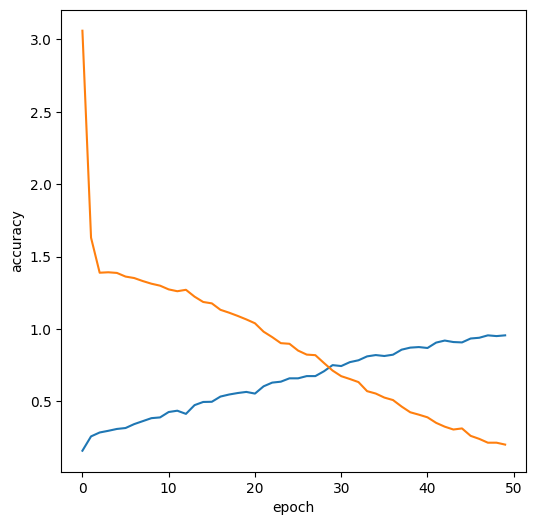

In [131]:
plt.figure(figsize=(6,6))
plt.plot(history.history["accuracy"], label="training_accuracy")
plt.plot(history.history["loss"] , label="val_loss")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [132]:
def make_prediction(input_data):
    input_data_scaled = sc.transform([input_data])  
    prediction = model.predict(input_data_scaled)
    predicted_class = np.argmax(prediction)
    return predicted_class, prediction


In [135]:

sample_input = [25, 1, 70, 1.75, 180, 150, 60, 1, 500, 0, 20, 2, 5, 23]  

predicted_class, prediction = make_prediction(sample_input)

# Display the result
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [137]:
model.save('gym.h5')

In [ ]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
